# Trajectory-Based Continuous Collision Detection (T-CCD) For 2D Particle Systems

The idea here is to develop a mathematical model for the development of T-CCD.

Initial Idea:
- Use the **Point Of Intersection (POI)** to determine if the trajectory of 2 particles has the potential to collide.

Suggested Idea by Sir. Roland:
- Use Newton's second law of motion $(\vec{F} = m\vec{a})$.

Apply this ideas to Continuous Collision Detection (CCD).

## Initial Idea

- Let $\vec{p_1}$ and $\vec{p_2}$ be the initial positions of the 2 particles.
- Let $\vec{v_1}$ and $\vec{v_2}$ be their velocities.

The parametric motion,

$$
\begin{align}
\vec{r_1}(t) & = \vec{p_1} + \vec{v_1}t \\
\vec{r_2}(t) & = \vec{p_2} + \vec{v_2}t
\end{align}
$$

The intersection occurs when,

$$
\begin{align}
\vec{r_1}(t) & = \vec{r_2}(t) \\
\vec{p_1} + \vec{v_1}t & = \vec{p_2} + \vec{v_2}t
\end{align}
$$

Rearrange the equation into a linear form,

$$
(\vec{v_1} - \vec{v_2})t = \vec{p_2} - \vec{p_1} = \Delta \vec{v}
$$

This forms the system,

$$
\Delta \vec{v} = \begin{cases}
(v_{1x} - v_{2x})t & = \Delta x \\
(v_{1y} - v_{2y})t & = \Delta y
\end{cases}
$$

Definition of determinant,

$$
\begin{align}
\det(a, b) & = \vec{a} \times \vec{b} & (\text{Equivalent to } |\vec{a} \times \vec{b}| \text{ in 2D or the magnitude}) \\
& = a_x b_y - a_y b_x
\end{align}
$$

If the determinant of $\det(\vec{v_2}, \vec{v_1}) \neq 0$ then, define

$$
\Delta \vec{p} = \vec{p_2} - \vec{p_1}
$$

we can find the time it takes for the first particle to reach the intersection,

$$
\begin{align}
t_1 & = \frac{\det(\vec{v_2}, \Delta \vec{p})}{\det(\vec{v_2}, \vec{v_1})} \\
& = \frac{v_{2x} \Delta \vec{p}_y - v_{2y} \Delta \vec{p}_x}{v_{2x} v_{1y} - v_{2y} v_{1x}}
\end{align}
$$

Similarly, we can also find the time it takes for the second particle to reach the intersection,

$$
\begin{align}
t_2 & = \frac{\det(\vec{v_1}, \Delta \vec{p})}{\det(\vec{v_2}, \vec{v_1})} \\
& = \frac{v_{1x} \Delta \vec{p}_y - v_{1y} \Delta \vec{p}_x}{v_{2x} v_{1y} - v_{2y} v_{1x}}
\end{align}
$$

With this, we can find the point of intersection,

$$
POI = r_1(t_1) = r_2(t_2)
$$

When $\det(\vec{v_2}, \vec{v_1}) = 0$, then the objects are either **parallel** or **co-linear**, meaning no interrsection will occur.

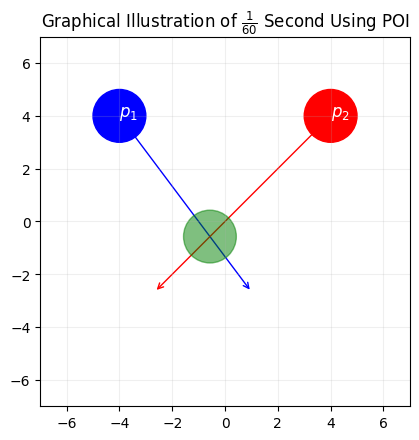

In [1]:
import matplotlib.pyplot as plt

# Particle size
radii = 1

# First frame out of 60 frames
ft = 1 / 60

# Initial position of Particle 1
p1 = (-4.0, 4.0)
v1 = (300.0, -400.0)

# Initial position of particle 2
p2 = (4.0, 4.0)
v2 = (-400.0, -400.0)

# Radius velocity of particle 1
r1 = (p1[0] + v1[0] * ft, p1[1] + v1[1] * ft)

# Radius velocity of particle 2
r2 = (p2[0] + v2[0] * ft, p2[1] + v2[1] * ft)

# Find the intersection using determinant
det = v2[0] * v1[1] - v2[1] * v1[0]

if (det != 0.0):
    dp = [p2[0] - p1[0], p2[1] - p1[1]]

    t1 = (v2[0] * dp[1] - v2[1] * dp[0]) / det
    t2 = (v1[0] * dp[1] - v1[1] * dp[0]) / det

    poi = (p1[0] + v1[0] * t1, p1[1] + v1[1] * t1)

    plt.gca().add_patch(plt.Circle(poi, radii, color="green", alpha=0.5))

plt.title(r"Graphical Illustration of $\frac{1}{60}$ Second Using POI")

plt.gca().add_patch(plt.Circle(p1, radii, color="blue"))
plt.annotate(r"$p_1$", (p1[0], p1[1]), color="white", fontsize=12)

plt.gca().add_patch(plt.Circle(p2, radii, color="red"))
plt.annotate(r"$p_2$", (p2[0], p2[1]), color="white", fontsize=12)

plt.annotate("", xy=p1, xytext=(r1[0], r1[1]), arrowprops=dict(arrowstyle="<-", color="blue", lw=1), zorder=0)
plt.annotate("", xy=p2, xytext=(r2[0], r2[1]), arrowprops=dict(arrowstyle="<-", color="red", lw=1), zorder=0)

plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.gca().set_aspect("equal")

plt.grid(alpha=0.2)
plt.show()

Limitation to this idea:

- Unable to find the exact point/time where the 2 particles will collide.

A suggestion we found [online](https://math.stackexchange.com/questions/4815976/how-do-i-find-the-first-point-of-collision-of-2-circles-moving-in-a-2d-space), stated to use the **pythagorean theorem**. This made more sense because we simply have to calculate the distance between two points using their **cartesian coordinates**.

## Using Pythagorean Theorem

The initial approach using parametric motion helped find the potential point of interseciton. But, it does not consider the actual size of the particles.

- Let $\vec{p_1}$ and $\vec{p_2}$ be the initial positions of the 2 particles.
- Let $\vec{v_1}$ and $\vec{v_2}$ be their velocities.
- Let $r_1$ and $r_2$ be their radius.

Using the distance formula, we can calculate the distance betweent he two objects at any given time $t$,

$$
d(t) = \sqrt{(x_2t - x_1t)^2 + (y_2t - y_1t)^2}
$$

A collision occurs when the sum of the radii of the two particles is equal to or greater than their distance,

$$
\begin{align}
d(t) & = r_1 + r_2 \\
(x_2t - x_1t)^2 + (y_2t - y_1t)^2 & = (r_1 + r_2)^2
\end{align}
$$

Using the formula we solve for $t$, we first define our variables,

$$
\begin{align}
\Delta \vec{p} & = \vec{p_2} - \vec{p_1} \\
\Delta \vec{v} & = \vec{v_2} - \vec{v_1}
\end{align}
$$

Substitute into the expanded form resulting in a standard quadratic equation,

$$
at^2 + bt + c = 0
$$

where,

$$
\begin{align}
a & = \Delta \vec{v}_x^2 + \Delta \vec{v}_y^2 \\
b & = 2(\Delta \vec{p}_x \Delta \vec{v}_x + \Delta \vec{p}_y \Delta \vec{v}_y) \\
c & = \Delta \vec{p}_x^2 + \Delta \vec{p}_y^2 - (r_1 + r_2)^2
\end{align}
$$

The quadratic formula provides the time at which the collision occurs,

$$
t = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
$$

The earliest positive time of $t_{min}$ represents the time of the first collision. If the discriminant $(b^2 - 4ac) < 0$, then there is no collision. Link to [desmos](https://www.desmos.com/calculator/fap78jkujh) to verify.

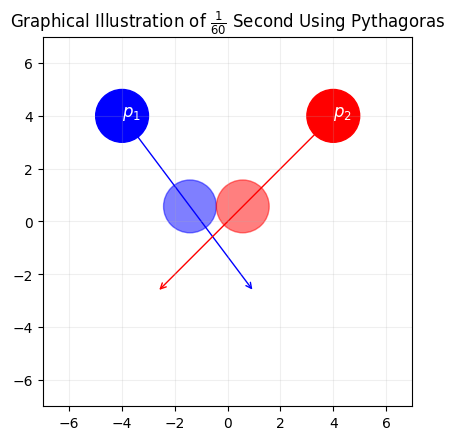

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Particle size
radii = 1

# First frame out of 60 frames
ft = 1 / 60

# Initial position of particle 1
p1 = (-4.0, 4.0)
v1 = (300.0, -400.0)

# Initial position of particle 2
p2 = (4.0, 4.0)
v2 = (-400.0, -400.0)

# Radius velocity of particle 1
r1 = (p1[0] + v1[0] * ft, p1[1] + v1[1] * ft)

# Radius velocity of particle 2
r2 = (p2[0] + v2[0] * ft, p2[1] + v2[1] * ft)

# Delta position
dp = (p2[0] - p1[0], p2[1] - p1[1])
# Delta velocity
dv = (v2[0] - v1[0], v2[1] - v1[1])

a = dv[0] ** 2 + dv[1] ** 2
b = 2 * (dp[0] * dv[0] + dp[1] * dv[1])
c = dp[0] ** 2 + dp[1] ** 2 - (radii + radii) ** 2

t = min((-b + np.sqrt(b ** 2 - 4 * a * c)) / (2 * a), (-b - np.sqrt(b ** 2 - 4 * a * c)) / (2 * a))

# Point of collision for particle 1
c1 = (p1[0] + v1[0] * t, p1[1] + v1[1] * t)
# point of collision for particle 2
c2 = (p2[0] + v2[0] * t, p2[1] + v2[1] * t)

plt.gca().add_patch(plt.Circle(c1, radii, color="blue", alpha=0.5))
plt.gca().add_patch(plt.Circle(c2, radii, color="red", alpha=0.5))

plt.title(r"Graphical Illustration of $\frac{1}{60}$ Second Using Pythagoras")

plt.gca().add_patch(plt.Circle(p1, radii, color="blue"))
plt.annotate(r"$p_1$", (p1[0], p1[1]), color="white", fontsize=12)

plt.gca().add_patch(plt.Circle(p2, radii, color="red"))
plt.annotate(r"$p_2$", (p2[0], p2[1]), color="white", fontsize=12)

plt.annotate("", xy=p1, xytext=(r1[0], r1[1]), arrowprops=dict(arrowstyle="<-", color="blue", lw=1), zorder=0)
plt.annotate("", xy=p2, xytext=(r2[0], r2[1]), arrowprops=dict(arrowstyle="<-", color="red", lw=1), zorder=0)

plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.gca().set_aspect("equal")

plt.grid(alpha=0.2)
plt.show()

## Suggested Idea

$$
\vec{F} = m\vec{a}
$$